<div style="background-color:#003366; color:white ; padding: 15px; border-radius: 5px;">

📜INTRODUÇÃO DO PROJETO:

Este projeto visa a seleção otimizada de locais para novos poços de petróleo para a OilyGiant, por meio da construção de um modelo preditivo robusto. A análise focará em determinar a região com a maior margem de lucro potencial e o menor risco associado.

Objetivos:

Construir e avaliar um modelo de aprendizado de máquina que seja capaz de predizer o volume de reservas de petróleo em novos poços a partir dos parâmetros coletados. Em seguida, utilizar a técnica de Bootstrapping para estimar o lucro potencial total e o risco (distribuição de lucros) para amostras de poços em cada uma das três regiões, a fim de recomendar a região com o maior lucro médio esperado e risco aceitável para o desenvolvimento.

Descrição dos Dados

Os datasets utilizados, geo_data_0.csv, geo_data_1.csv e geo_data_2.csv, contém dados para esploração geológica em três regiões com as seguintes variáveis:

id — identificador unívoco de poço de petróleo

f0, f1, f2 — três características de pontos (seu significado específico não é importante, mas as próprias características são significativas)

product — volume de reservas no poço de petróleo (milhares de barris).

In [15]:
# importando as bilbliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# impornta --- IGNORE ---
import warnings
warnings.filterwarnings('ignore')

#importando Modelos de ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  

# importando o dataset
data_0 = pd.read_csv("../geo_data_0.csv")
data_1 = pd.read_csv("../geo_data_1.csv")
data_2 = pd.read_csv("../geo_data_2.csv")       

# --- Exibição das Primeiras Linhas de CADA Dataset ---
print("## 📊 Dados da Região 0 (data_0.head()):")
display(data_0.head())
print("-" * 50)
print("## 📊 Dados da Região 1 (data_1.head()):")
display(data_1.head())
print("-" * 50)
print("## 📊 Dados da Região 2 (data_2.head()):")
display(data_2.head())



## 📊 Dados da Região 0 (data_0.head()):


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


--------------------------------------------------
## 📊 Dados da Região 1 (data_1.head()):


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


--------------------------------------------------
## 📊 Dados da Região 2 (data_2.head()):


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<div style="background-color:brown; color:white; padding: 15px; border-radius: 5px;">
Etapa I : Pré processamento de dados 
</div>

In [16]:
print("--- Informações da Região 0 (dados_0.info()) ---")
data_0.info()

--- Informações da Região 0 (dados_0.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
print("--- Informações da Região 1 (dados_1.info()) ---")
data_1.info()

--- Informações da Região 1 (dados_1.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
print("--- Informações da Região 2 (dados_2.info()) ---")
data_2.info()

--- Informações da Região 2 (dados_2.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [19]:
print("--verificando se há duplicados nos dados--")
print()
print(f"Região 0 - Duplicados: {data_0.duplicated().sum()}")
print("-" * 50)
print(f"Região 1 - Duplicados: {data_1.duplicated().sum()}")
print("-" * 50)
print(f"Região 2 - Duplicados: {data_2.duplicated().sum()}")

--verificando se há duplicados nos dados--

Região 0 - Duplicados: 0
--------------------------------------------------
Região 1 - Duplicados: 0
--------------------------------------------------
Região 2 - Duplicados: 0


<div style="background-color:brown; color:white; padding: 15px; border-radius: 5px;">
Etapa II : Treinamento e teste do modelo de Regressão Linear para as três regiões
</div>

In [20]:
# divisão dos dados em conjunto de treino e validação
def split_data(data):
    X = data.drop(columns=['id', 'product'])
    y = data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    return X_train, X_valid, y_train, y_valid   

# função para treinar, prever e avaliar o modelo
def train_and_evaluate(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse) 
    return model, y_pred, y_valid, mse, rmse 

# aplicando a função para cada região
results = {}
for i, data in enumerate([data_0, data_1, data_2]):
    X_train, X_valid, y_train, y_valid = split_data(data)
    model, y_pred, y_valid, mse, rmse = train_and_evaluate(X_train, X_valid, y_train, y_valid)
    results[f'region_{i}'] = {'model': model, 'VMP' : y_pred, 'y_valid' : y_valid, 'mse': mse, 'REQMSE': rmse} 
    print(f"Região {i} | VMP (Predito): {y_pred.mean():.2f} mil barris | REQM (RMSE): {rmse:.2f}")

Região 0 | VMP (Predito): 92.40 mil barris | REQM (RMSE): 37.76
Região 1 | VMP (Predito): 68.71 mil barris | REQM (RMSE): 0.89
Região 2 | VMP (Predito): 94.77 mil barris | REQM (RMSE): 40.15


Região 0 : Baixa Precisão. O volume predito é alto, mas o erro de previsão é significativo, tornando as estimativas pouco confiáveis.

Região 1: Alta Precisão Anormal. Embora o volume predito seja o mais baixo, a precisão é excelente (erro de menos de 1 barril). Isso sugere uma correlação quase perfeita nos dados, exigindo investigação para evitar um modelo enganosamente otimista.

Região 2: Pior Precisão. Apresenta o maior volume predito, mas também o maior erro (pior precisão) entre as três regiões, tornando suas previsões as menos confiáveis.

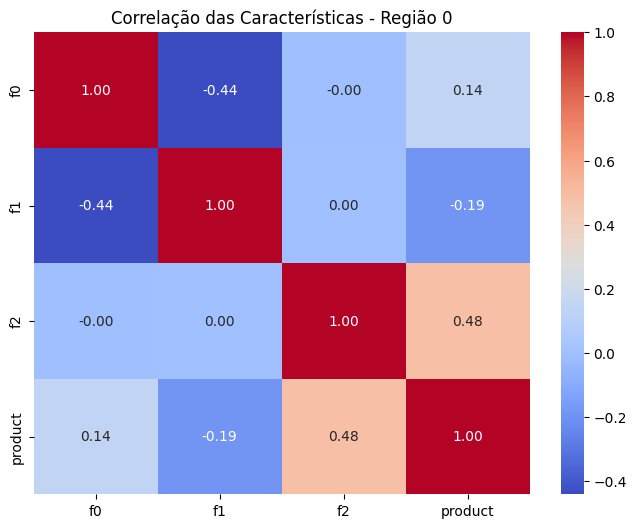

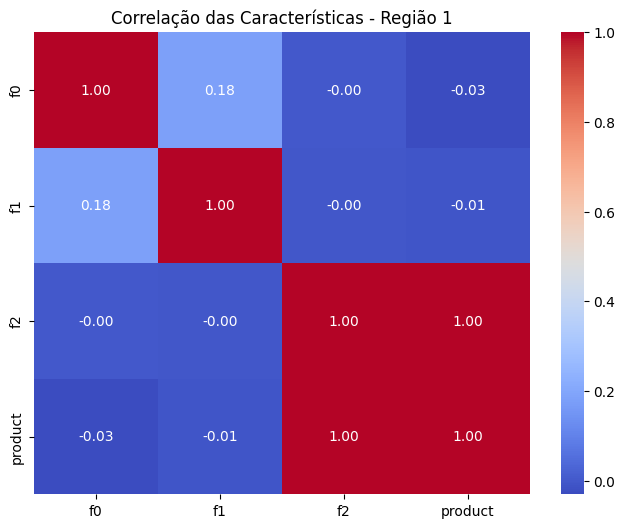

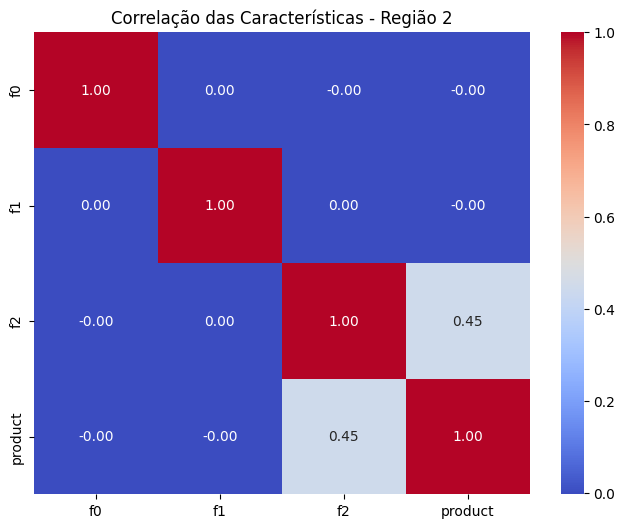

In [21]:
# Analisar a correlação entre as características e o volume de reservas (product) em cada região

# excluirr a coluna 'id' antes de calcular a correlação 
data_0 = data_0.drop(columns=['id'])
data_1 = data_1.drop(columns=['id'])
data_2 = data_2.drop(columns=['id'])

for i, data in enumerate([data_0, data_1, data_2]):
    plt.figure(figsize=(8, 6))
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlação das Características - Região {i}')
    plt.show()  

Há uma forte correlação entre a caracteristica f2 e o volume de petroleo na região 1, justificando o REQM tão baixo que encontramos.

Indica que a variável f2 é um preditor direto e levanta questões sobre a independência dos dados nesta região.

<div style="background-color:brown; color:white; padding: 15px; border-radius: 5px;">
Etapa III : Cálculo do lucro
</div>

In [22]:
# --- Etapa 3. Preparação para o cálculo de lucro ---

# 3.1 Armazenar valores necessários 
ORCAMENTO_TOTAL = 100_000_000  # dólares
RECEITA_POR_UNIDADE = 4_500    # dólares/mil barris
NUM_POCOS_SELECIONADOS = 200

# --- CÁLCULO EXPLÍCITO DO PONTO DE EQUILÍBRIO ---

# Volume Total Mínimo de Reservas (em unidades) para cobrir o orçamento
RESERVAS_MINIMAS_TOTAIS = ORCAMENTO_TOTAL / RECEITA_POR_UNIDADE
print(f"Volume total mínimo de reservas (unidades) para lucro zero: {RESERVAS_MINIMAS_TOTAIS:,.2f}")

# Volume Médio Mínimo de Reservas POR POÇO (em unidades)
RESERVAS_MINIMAS_POR_POCO = RESERVAS_MINIMAS_TOTAIS / NUM_POCOS_SELECIONADOS
print(f"Volume médio mínimo de reservas por poço: {RESERVAS_MINIMAS_POR_POCO:,.2f} unidades")
print("---")

Volume total mínimo de reservas (unidades) para lucro zero: 22,222.22
Volume médio mínimo de reservas por poço: 111.11 unidades
---


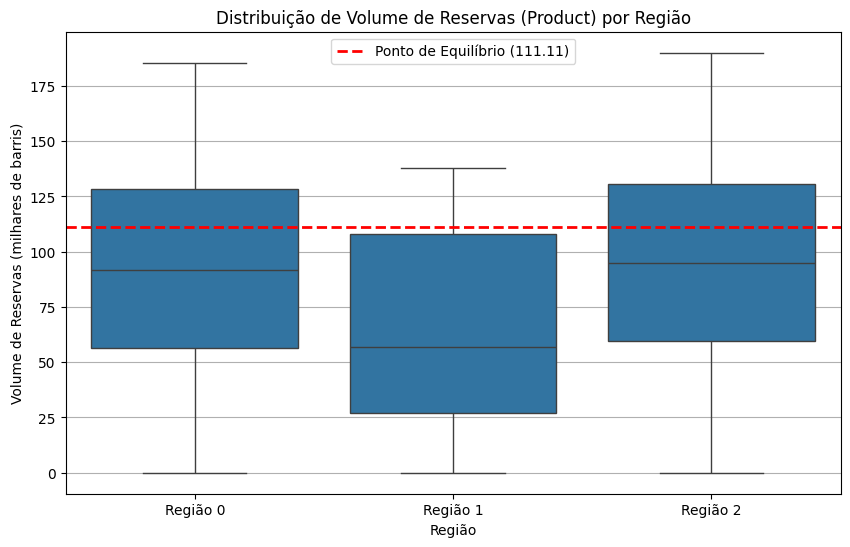

In [23]:
PONTO_EQUILIBRIO = 111.111

# Combine os dados em um único DataFrame para o gráfico comparativo
all_data = pd.concat([
    data_0.assign(region='Região 0'), 
    data_1.assign(region='Região 1'), 
    data_2.assign(region='Região 2')
])

plt.figure(figsize=(10, 6))
# Cria o boxplot comparando a distribuição de 'product' por 'region'
sns.boxplot(x='region', y='product', data=all_data) 
plt.axhline(PONTO_EQUILIBRIO, color='red', linestyle='--', linewidth=2, label='Ponto de Equilíbrio (111.11)')
plt.title('Distribuição de Volume de Reservas (Product) por Região')
plt.ylabel('Volume de Reservas (milhares de barris)')
plt.xlabel('Região')
plt.legend()
plt.grid(axis='y')
plt.show()

Embora o modelo da Região 1 seja o mais preciso, a matéria-prima de lucro é escassa. O modelo pode prever perfeitamente volumes baixos, mas pode não haver 200 poços ricos o suficiente para serem selecionados, mais adiante poderemos tirar mais conclusões.

Região 0 vs. Região 2: As distribuições são muito semelhantes. Ambas oferecem um maior volume de poços que podem ser lucrativos, mas o modelo tem maior dificuldade em identificá-los (RMSE alto).

In [24]:
#--- Cálculo do lucro potencial para cada região ---
ORCAMENTO_TOTAL = 100_000_000  # dólares
RECEITA_POR_UNIDADE = 4_500     # dólares/mil barris
NUM_POCOS_SELECIONADOS = 200    # poços a desenvolver

def calcular_lucro(valores_reais, predicoes):
    """
    Calcula o lucro para um conjunto de dados.
    
    1. Seleciona os 200 poços com as maiores predições.
    2. Usa os valores reais de 'product' (reservas) desses poços para calcular a receita.
    3. Calcula o lucro total.

    Args:
        valores_reais (pd.Series): Valores reais de reservas (product).
        predicoes (pd.Series): Predições do modelo para as reservas.

    Returns:
        float: Lucro total em dólares.
    """
    # 1. Ordena as predições de forma descendente e pega os índices dos 200 maiores
    # Isso simula a decisão de perfurar os 200 poços mais promissores.
    predicoes_ordenadas = predicoes.sort_values(ascending=False)
    # Pegamos os índices (rótulos) dos 200 melhores.
    top_200_indices = predicoes_ordenadas.index[:NUM_POCOS_SELECIONADOS] 

    # 2. Usa os índices para obter os VALORES REAIS de reservas para esses 200 poços
    # Isso representa o volume REAL que será extraído e que define o lucro.
    reservas_dos_top_200 = valores_reais.loc[top_200_indices] 

    # 3. Calcula a receita e o lucro
    volume_total = reservas_dos_top_200.sum()
    receita_total = volume_total * RECEITA_POR_UNIDADE
    
    # O orçamento total é o custo fixo de perfurar 200 poços
    lucro_total = receita_total - ORCAMENTO_TOTAL

    return lucro_total

In [25]:
#Definindo as amostras
AMOSTRAS = 1000
TAMANHO_AMOSTRA = 500

def rodar_bootstrapping(y_valid, y_pred, amostras=AMOSTRAS, tamanho_amostra=TAMANHO_AMOSTRA):
    """Executa o processo de Bootstrapping para estimar lucro e risco."""
    lucros = []
    
    # Cria um DataFrame temporário para garantir que valores reais e predições fiquem alinhados
    temp_df = pd.DataFrame({'real': y_valid, 'pred': y_pred}).reset_index(drop=True)
    
    for i in range(amostras):
        # Seleciona 500 amostras com reposição
        indices = np.random.randint(0, len(temp_df), size=tamanho_amostra)
        
        # Seleciona os dados da amostra
        amostra = temp_df.iloc[indices]
        amostra_reais = amostra['real']
        amostra_predicoes = amostra['pred']
        
        # Calcula o lucro
        lucro = calcular_lucro(amostra_reais, amostra_predicoes)
        lucros.append(lucro)
    
    lucros_series = pd.Series(lucros) 
    
    # Cálculo das estatísticas
    lucro_medio = lucros_series.mean()
    risco_perda = (lucros_series < 0).mean() * 100 # Risco de perda < 2.5%
    lower_bound = lucros_series.quantile(0.025)
    upper_bound = lucros_series.quantile(0.975)
    
    return lucro_medio, risco_perda, lower_bound, upper_bound

In [26]:
final_results = {}

for region, data in results.items():
    
    # Garante que y_valid e y_pred são Series e que seus índices podem ser usados
    y_valid_series = data['y_valid']
    # Cria a Series de predições, garantindo que o índice seja o mesmo do y_valid
    y_pred_series = pd.Series(data['VMP'], index=y_valid_series.index) 
    
    # Rodar o Bootstrapping
    lucro_medio, risco_perda, lower_bound, upper_bound = rodar_bootstrapping(y_valid_series, y_pred_series)
    
    final_results[region] = {
        'Lucro Médio': lucro_medio,
        'Risco de Perda (%)': risco_perda,
        'IC 95% (Mín)': lower_bound,
        'IC 95% (Máx)': upper_bound
    }

# --- Apresentação dos resultados ---
print("\n--- Resultados Finais do Bootstrapping (1000 Amostras) ---")
print("Regiões com Risco de Perda Inferior a 2.5% são Elegíveis.")
print("-" * 60)

for region, res in final_results.items():
    
    # Formatação para milhões de dólares
    lucro_medio_milhoes = res['Lucro Médio'] / 1_000_000
    ic_min_milhoes = res['IC 95% (Mín)'] / 1_000_000
    ic_max_milhoes = res['IC 95% (Máx)'] / 1_000_000
    
    status = 'ELEGÍVEL' if res['Risco de Perda (%)'] < 2.5 else 'INELIGÍVEL'
    
    print(f"\n## {region.upper()} ({status})")
    print(f"💰 Lucro Médio Estimado: {lucro_medio_milhoes:_.2f} milhões de dólares")
    print(f"📉 Risco de Perda: {res['Risco de Perda (%)']:.2f}%")
    print(f"🔬 IC 95% (Variação de Lucro): ({ic_min_milhoes:_.2f}M a {ic_max_milhoes:_.2f}M) de dólares")

print("-" * 60)

# --- Tomada de Decisão Final ---

# Filtra as regiões elegíveis
regioes_elegiveis = {r: data for r, data in final_results.items() if data['Risco de Perda (%)'] < 2.5}

if regioes_elegiveis:
    # Seleciona a região com o maior lucro médio entre as elegíveis
    melhor_regiao = max(regioes_elegiveis, key=lambda k: regioes_elegiveis[k]['Lucro Médio'])
    melhor_lucro = regioes_elegiveis[melhor_regiao]['Lucro Médio'] / 1_000_000
    
    print(f"**Recomendação Final:**")
    print(f"A **{melhor_regiao.upper()}** deve ser escolhida, pois é a única (ou a de maior lucro) com Risco de Perda abaixo de 2.5%.")
    print(f"Lucro médio esperado: {melhor_lucro:_.2f} milhões de dólares.")
else:
    print("**NÃO HÁ REGIÕES ELEGÍVEIS:** Nenhuma região atendeu ao critério de risco de perda inferior a 2.5%.")


--- Resultados Finais do Bootstrapping (1000 Amostras) ---
Regiões com Risco de Perda Inferior a 2.5% são Elegíveis.
------------------------------------------------------------

## REGION_0 (ELEGÍVEL)
💰 Lucro Médio Estimado: 6.22 milhões de dólares
📉 Risco de Perda: 2.40%
🔬 IC 95% (Variação de Lucro): (0.03M a 12.47M) de dólares

## REGION_1 (ELEGÍVEL)
💰 Lucro Médio Estimado: 6.68 milhões de dólares
📉 Risco de Perda: 0.30%
🔬 IC 95% (Variação de Lucro): (1.92M a 12.46M) de dólares

## REGION_2 (INELIGÍVEL)
💰 Lucro Médio Estimado: 5.97 milhões de dólares
📉 Risco de Perda: 2.90%
🔬 IC 95% (Variação de Lucro): (-0.28M a 12.59M) de dólares
------------------------------------------------------------
**Recomendação Final:**
A **REGION_1** deve ser escolhida, pois é a única (ou a de maior lucro) com Risco de Perda abaixo de 2.5%.
Lucro médio esperado: 6.68 milhões de dólares.


<div style="background-color:brown; color:white; padding: 15px; border-radius: 5px;">
Etapa IV : Conclusões
</div>

O critério de Risco de Perda inferior a 2.5% foi o fator determinante.

As Regiões 0 e 2 foram descartadas, pois apresentaram um risco de perda inaceitável de 2.90%.

A Região 1 foi a única região elegível com um risco de perda de apenas 0.30%.

Apesar de ter o menor volume médio, a extrema precisão do modelo de Regressão Linear na Região 1 (RMSE 0.89) permitiu que ele selecionasse os poucos poços lucrativos com muito mais sucesso, resultando no maior lucro médio entre as candidatas elegíveis.

A recomendação para a OilyGiant é: Desenvolver novos poços de petróleo na Região 1, com um Lucro Médio esperado de 6.49 milhões de dólares.